In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体（根据你的系统和字体选择进行更改）
plt.rcParams['font.family'] = ['Microsoft YaHei']  # 使用微软雅黑字体

# 读取CSV文件
csv_file = '/media/checkpoint/speech_data/video/str/兔兔没有牙.csv'  # 替换成你的CSV文件路径
df = pd.read_csv(csv_file)


/tmp/ipykernel_33606/1212370140.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  start_times = pd.to_datetime(df['开始时间'])
/tmp/ipykernel_33606/1212370140.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  end_times = pd.to_datetime(df['结束时间'])


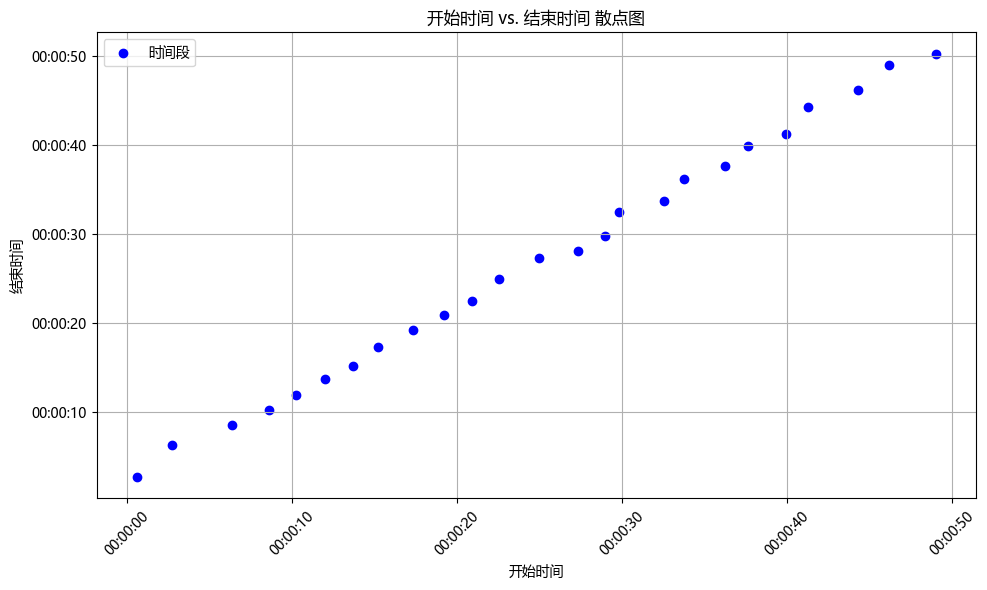

In [5]:


# 提取开始时间和结束时间列
start_times = pd.to_datetime(df['开始时间'])
end_times = pd.to_datetime(df['结束时间'])

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(start_times, end_times, marker='o', c='b', label='时间段')
plt.xlabel('开始时间')
plt.ylabel('结束时间')
plt.title('开始时间 vs. 结束时间 散点图')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # 如果时间戳较长，可以旋转X轴标签以获得更好的可读性
plt.tight_layout()

# 显示散点图
plt.show()


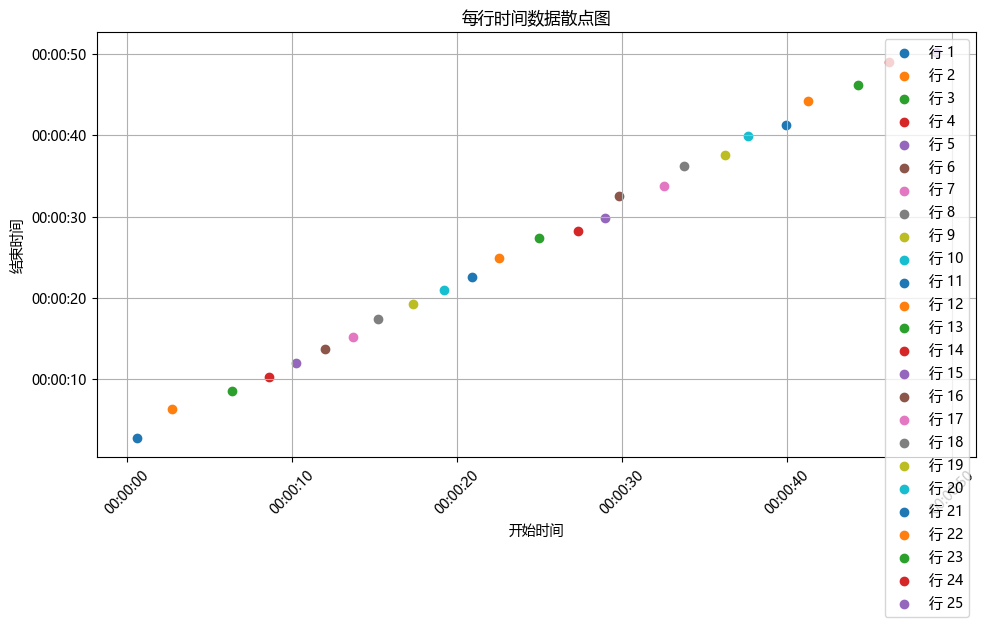

In [6]:
 

# 循环处理每一行数据并绘制散点图
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    start_time = pd.to_datetime(row['开始时间'])
    end_time = pd.to_datetime(row['结束时间'])
    
    # 绘制每行的散点
    plt.scatter(start_time, end_time, marker='o', label=f'行 {index + 1}')

plt.xlabel('开始时间')
plt.ylabel('结束时间')
plt.title('每行时间数据散点图')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # 如果时间戳较长，可以旋转X轴标签以获得更好的可读性
plt.tight_layout()

# 显示散点图
plt.show()


/tmp/ipykernel_33606/3523447126.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()
/tmp/ipykernel_33606/3523447126.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()


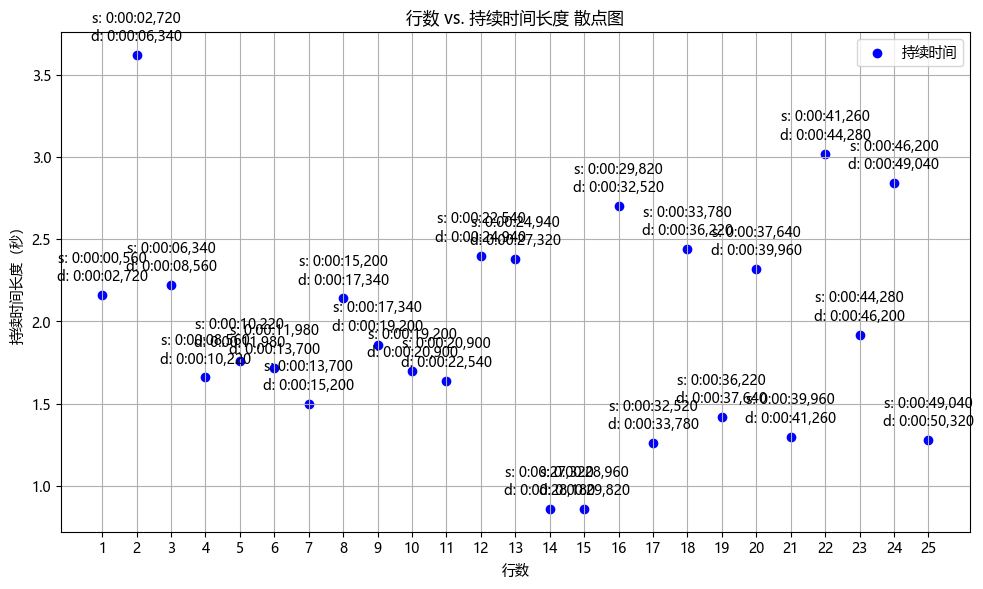

In [14]:
 

# 计算每行的时间长度
df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['持续时间'], marker='o', c='b', label='持续时间')

# 标记每个数据点的开始时间和结束时间
for i, row in df.iterrows():
    plt.annotate(f"s: {row['开始时间']}\nd: {row['结束时间']}",
                 (i, row['持续时间']),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.xlabel('行数')
plt.ylabel('持续时间长度（秒）')
plt.title('行数 vs. 持续时间长度 散点图')
plt.grid(True)
plt.legend()
plt.xticks(df.index, df.index + 1)  # 设置x轴标签为行数（从1开始）
plt.tight_layout()

# 显示散点图
plt.show()


/tmp/ipykernel_33606/1272239173.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()
/tmp/ipykernel_33606/1272239173.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()


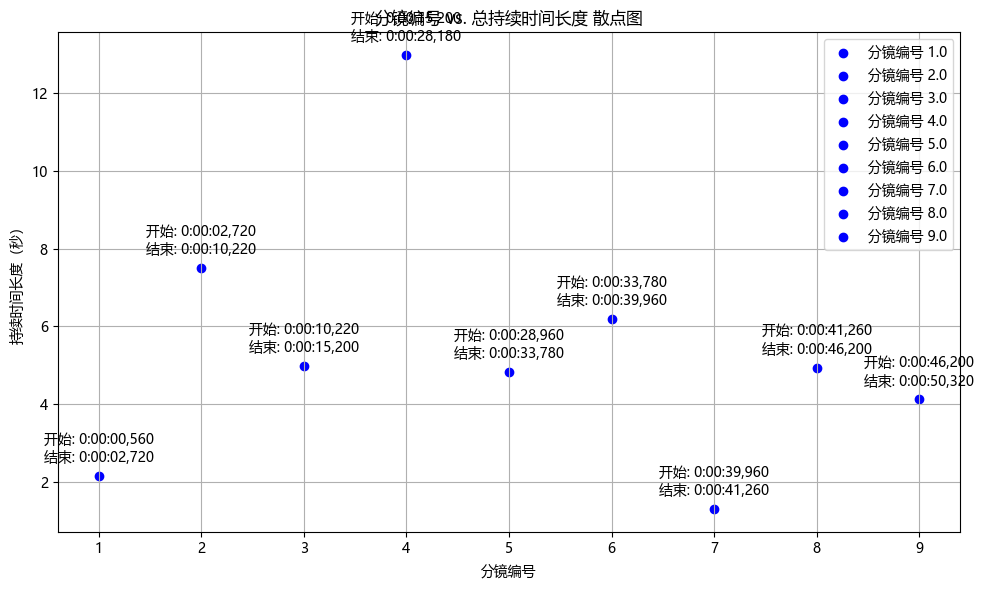

In [16]:


# 计算每个分镜编号的总持续时间
df['持续时间'] = (pd.to_datetime(df['结束时间']) - pd.to_datetime(df['开始时间'])).dt.total_seconds()
grouped_df = df.groupby('分镜')['持续时间'].sum().reset_index()

# 绘制散点图
plt.figure(figsize=(10, 6))
for i, row in grouped_df.iterrows():
    plt.scatter(i, row['持续时间'], marker='o', c='b', label=f'分镜编号 {row["分镜"]}')

    # 标记每个数据点的开始时间和结束时间
    plt.annotate(f"开始: {df[df['分镜'] == row['分镜']]['开始时间'].iloc[0]}\n结束: {df[df['分镜'] == row['分镜']]['结束时间'].iloc[-1]}",
                 (i, row['持续时间']),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.xlabel('分镜编号')
plt.ylabel('持续时间长度（秒）')
plt.title('分镜编号 vs. 总持续时间长度 散点图')
plt.grid(True)
plt.legend()
plt.xticks(grouped_df.index, grouped_df['分镜'])  # 设置x轴标签为分镜编号
plt.tight_layout()

# 显示散点图
plt.show()
